# Kickstarter Analysis
### A crowdfunding platform for creative projects and merchandising

I always have a few personal side ventures in the works and hope to one day find proper funding for one that has potential for success, so I analyzed a data set of Kickstarter projects from 2009-2017 to determine the factors which contribute to success, in addition to historical and seasonal trends to see how the platform is faring. Among the factors investigated were category popularity, goal amount, title wording, and seasonality.

# Table of Contents
&#8195;[**1. Libraries and Dependencies**](#Libraries-and-Dependencies)

&#8195;[**2. Datasets**](#Datasets)

&#8195;[**3. Content**](#Content)
>[*Plot 1: Historical Trend of Count of Kickstarter Project Count from 2009-2017*](#Historical-Trend-of-Project-Count)

>[*Plot 2: Historical Trend of KickStarter Project Success vs Failure from 2009-2017*](#Historical-Trend-Success-vs.-Failure)

>[*Plot 3: Trend of KickStarter Project Success vs Failure by Month*](#Seasonality-Trends-in-Success-Rate)

>[*Plot 4: Count of KickStarter Project Main Categories*](#Count-of-Main-Categories)

>[*Plot 5: Success and Failure Counts by KickStarter Project Subcategory*](#Success-vs.-Failure-by-Subcategory)

>[*Plot 6: Distribution of KickStarter Goal Amounts (<10^6) for Failed vs. Successful Projects in a Sample of     Subcategories*](#Distribution-of-Goal-Amounts-by-Subcategory)

>[*Wordcloud 1: Failed Project Titles Wordcloud*](#Failed-Project-Titles-Wordcloud)

>[*Wordcloud 2: Successful Project Titles Wordcloud*](#Successful-Project-Titles-Wordcloud)

#### Libraries and Dependencies

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from wordcloud import WordCloud

#### Datasets

In [3]:
df = pd.read_csv('/Users/gregmurray/Documents/Data_Viz/KickStarter/kickstarter-projects/ks-projects-201801.csv')

#### Content

In [27]:
df['deadline']=pd.to_datetime(df['deadline'], format='%Y/%m/%d')
df['launched']=pd.to_datetime(df['launched'], format='%Y/%m/%d')

In [28]:
df=df[df['state']!='live']


In [29]:
df['state_binary']=df['state']=='successful'

## KickStarter Popularity and Historical Trends

In [30]:
def fmt_x(x, y):
    if x>=1000:
        val = int(x)/1000
        return '{val:d}K'.format(val=int(val))
    else:
        return int(x)

In [31]:
df['launch_month']=df['launched'].dt.month
df['launch_year']=df['launched'].dt.year

In [32]:
df=df[df['launch_year']!=1970]

df for project counts by year

In [33]:
cnt_projects_x_year=df[df['launch_year']!=2018].groupby('launch_year')['ID'].count()

#### Historical Trend of Project Count

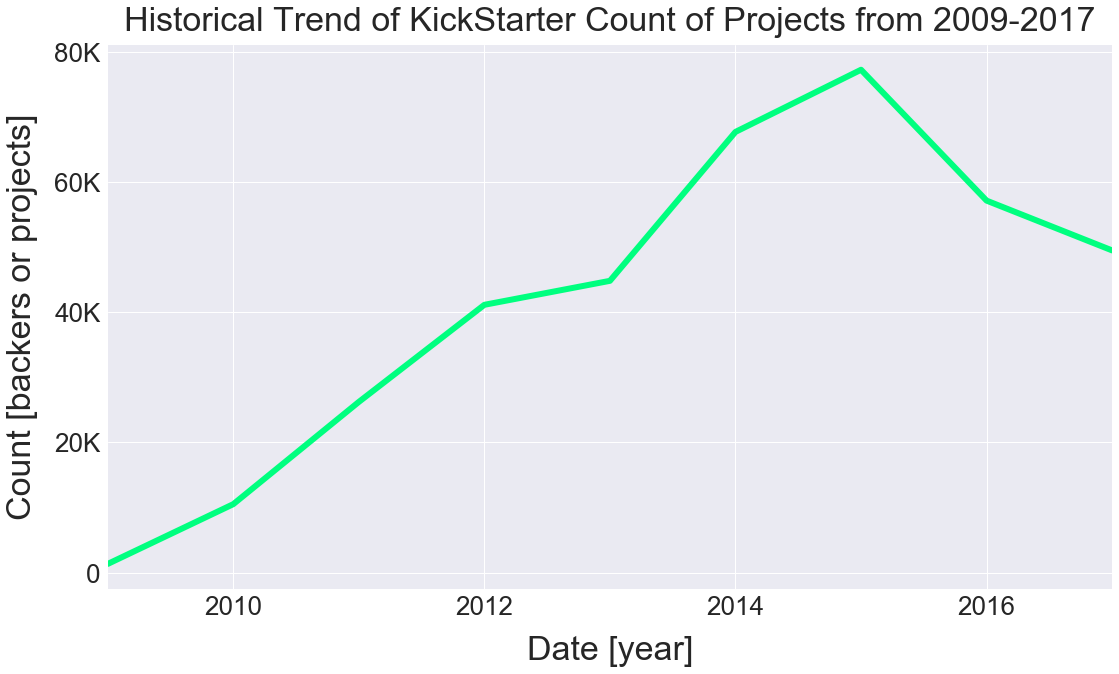

In [92]:
fig=cnt_projects_x_year.plot(kind='line', fontsize=26, grid=True, color='springgreen', linewidth=6, figsize=(18, 10))
plt.title("Historical Trend of KickStarter Count of Projects from 2009-2017", fontsize=34, y=1.015)
plt.xlabel("Date [year]", fontsize=34, labelpad=16)
plt.ylabel("Count [backers or projects]", fontsize=34, labelpad=16)
fig.yaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.show()

ANALYSIS: From its inception in 2009, KickStarter grew steadily until it peaked in 2015 and has started a slow decline.

df's for successful and failed project counts by year

In [35]:
cnt_failed_projects_x_year=df[(df['launch_year']!=2018) & (df['state_binary']==False)].groupby('launch_year')['ID'].count()
cnt_succ_projects_x_year=df[(df['launch_year']!=2018) & (df['state_binary']==True)].groupby('launch_year')['ID'].count()

#### Historical Trend Success vs. Failure

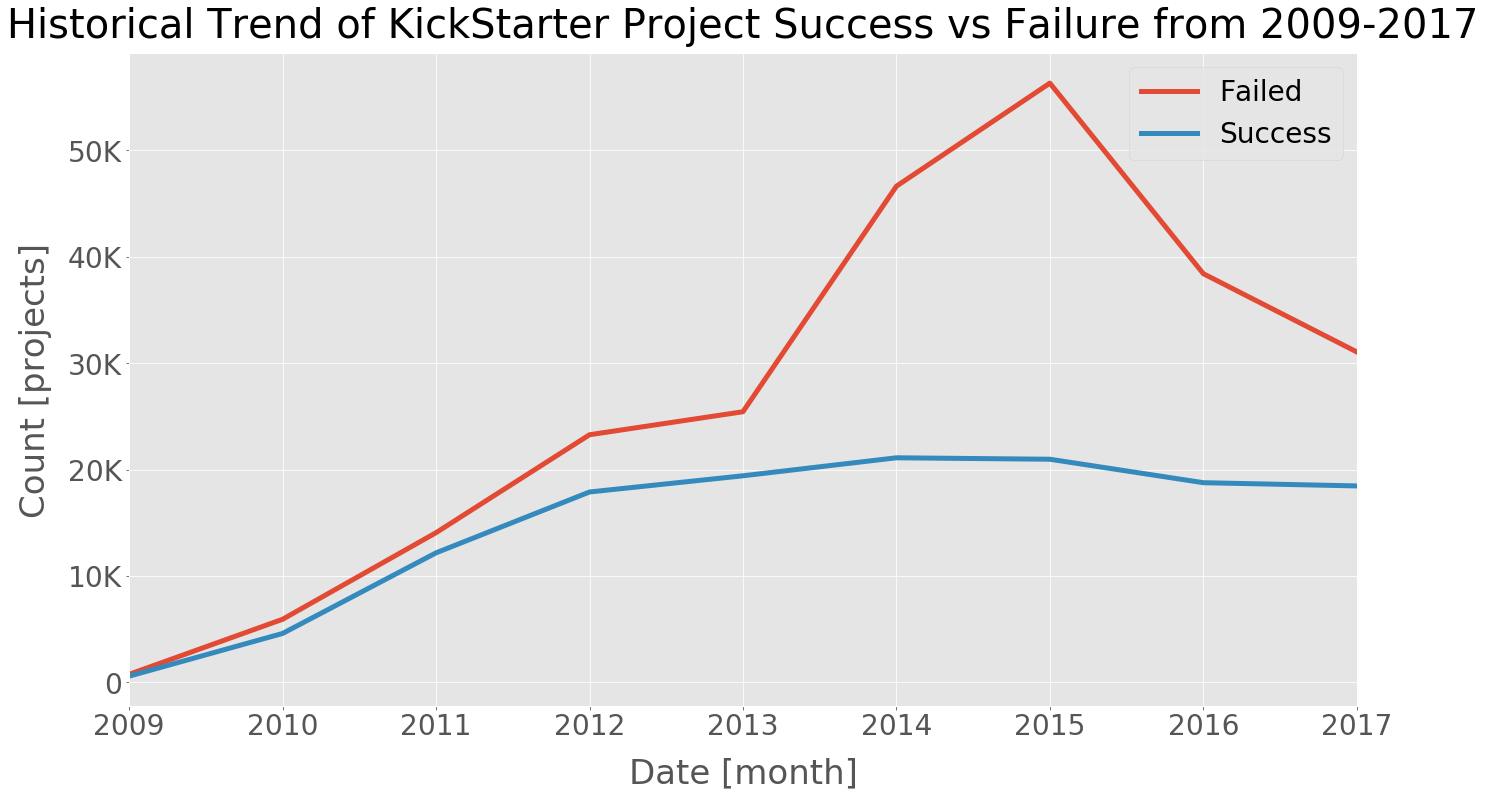

In [36]:
plt.style.use('ggplot')
fig1=cnt_failed_projects_x_year.plot(kind='line', fontsize=28, grid=True, linewidth=5, figsize=(22, 12))
fig2=cnt_succ_projects_x_year.plot(kind='line', fontsize=28, grid=True, linewidth=5)
plt.title("Historical Trend of KickStarter Project Success vs Failure from 2009-2017", fontsize=40, y=1.015)
plt.xlabel("Date [month]", fontsize=34, labelpad=16)
plt.ylabel("Count [projects]", fontsize=34, labelpad=16)
fig1.yaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.legend(['Failed', 'Success'], fontsize=28)
plt.show()

ANALYSIS: The spike in project count from 2013 to 2015 was not accompanied by an increase in pledges as nearly all the new project volume were failures.

## Factors of Project Success

### Seasonality Success Pattern Analysis

In [37]:
def change_to_abbrev(k):
    return calendar.month_abbr[k]

In [40]:
df['launch_month']=df['launch_month'].apply(change_to_abbrev)

create df's for the counts of failed and successful projects by month

In [41]:
cnt_failed_projects_x_month=pd.DataFrame(df[df['state_binary']==False].groupby('launch_month')['ID'].count())
cnt_failed_projects_x_month=cnt_failed_projects_x_month.reset_index()
cnt_succ_projects_x_month=pd.DataFrame(df[df['state_binary']==True].groupby('launch_month')['ID'].count())
cnt_succ_projects_x_month=cnt_succ_projects_x_month.reset_index()

In [42]:
success_rate_x_month=cnt_failed_projects_x_month.merge(cnt_succ_projects_x_month, how='inner', on='launch_month')

In [43]:
success_rate_x_month['Success_Rate']=success_rate_x_month['ID_y']/(success_rate_x_month['ID_x']+success_rate_x_month['ID_y'])

In [44]:
success_rate_x_month.drop(['ID_x', 'ID_y'], axis=1, inplace=True)

change the numbers to month abbrevs

In [45]:
success_rate_x_month.index=success_rate_x_month['launch_month']
success_rate_x_month.drop(['launch_month'], axis=1, inplace=True)
new_index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
success_rate_x_month=success_rate_x_month.reindex(new_index)

#### Seasonality Trends in Success Rate

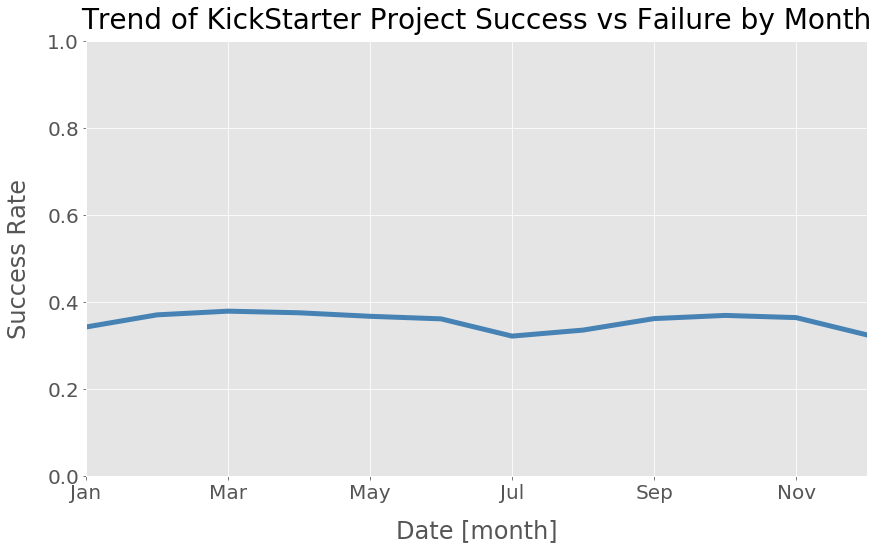

In [51]:
fig=success_rate_x_month.plot(kind='line', figsize=(14,8), fontsize=20, grid=True, linewidth=5, color='steelblue', legend=False)
plt.title("Trend of KickStarter Project Success vs Failure by Month", fontsize=28, y=1.015)
plt.xlabel("Date [month]", fontsize=24, labelpad=16)
plt.ylabel("Success Rate", fontsize=24, labelpad=16)
plt.ylim(0,1)
fig1.yaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.show()

ANALYSIS: There does not appear to be any significant seasonal difference in success aside from a slight decrease in January and the summer.

### Category Popularity

create df of main category count of projects

In [54]:
maincategory_cnt=pd.DataFrame(df.groupby(['main_category'])['ID'].count().sort_values(ascending=False))
maincategory_cnt=maincategory_cnt.reset_index()

#### Count of Main Categories

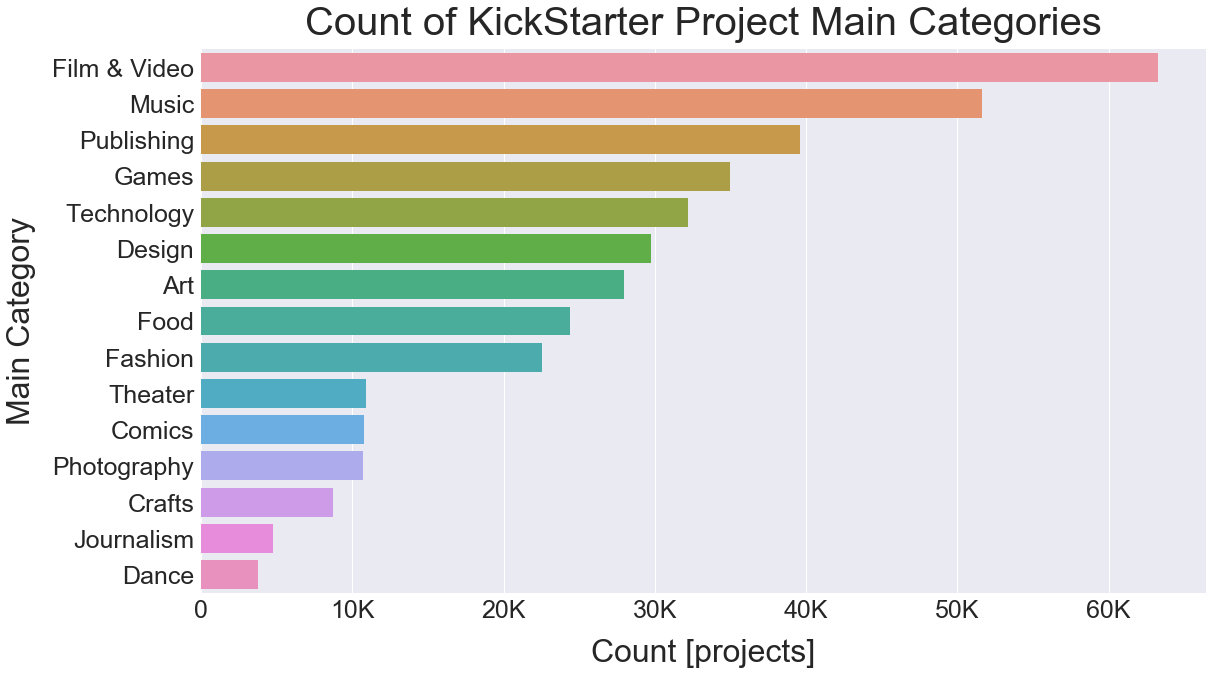

In [79]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(font_scale=2.5)
fig = sns.barplot(y="main_category", x="ID", data=maincategory_cnt)
plt.title('Count of KickStarter Project Main Categories', fontsize=40, y=1.015)
plt.xlabel("Count [projects]", fontsize=32, labelpad=16)
plt.ylabel("Main Category", fontsize=32, labelpad=16)
fig.xaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
for txt in fig.texts:
    txt.set_visible(False)
plt.show()

ANALYSIS: Surprisingly, 'Film & Video' and 'Music' projects are clearly more numerous than any other main category. The former nearly double the number of 'Technology' projects!

### Success Patterns by Category (top 6 main categories)

In [55]:
top6_maincategory_cnt=maincategory_cnt.head(6)

create df of the failed and successful project counts for each of the top 3 subcategories each of the top 6 main categories

In [66]:
subcategory_cnt=pd.DataFrame(df.groupby(['main_category', 'category'])['ID'].count().sort_values(ascending=False))
subcategory_cnt=subcategory_cnt.reset_index()

In [67]:
top6_maincat_with_subcat=top6_maincategory_cnt.merge(subcategory_cnt,how='left',left_on='main_category', right_on='main_category')

In [68]:
top6_top3subcat_cnt=top6_maincat_with_subcat.groupby(['main_category'])['ID_y'].nlargest(3)
top3_index=top6_top3subcat_cnt.reset_index()['level_1']

In [69]:
top6_maincat_top3_subcat=top6_maincat_with_subcat.iloc[top3_index].sort_values(by=['ID_x', 'ID_y'], ascending=False)
top6_maincat_top3_subcat=top6_maincat_top3_subcat[['main_category', 'category', 'ID_y']]

create a lookup list of the top 18 subcategories to filter the df's with

In [70]:
top18_subcat=list(top6_maincat_top3_subcat['category'])

In [71]:
top18_subcat_df=df[df['category'].isin(top18_subcat)]

In [72]:
top18_subcat_df['main:sub']=top18_subcat_df['main_category'].apply(lambda x: x.upper())+" : "+top18_subcat_df['category'] 

/Users/gregmurray/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
success_x_subcat = pd.DataFrame(top18_subcat_df.groupby(['main:sub', 'state_binary'])['main:sub'].count().unstack('state_binary'))

temporarily create ratio column to order the df by those values

In [74]:
success_x_subcat['Ratio']=success_x_subcat[False]/success_x_subcat[True]
success_x_subcat=success_x_subcat.sort_values(by='Ratio', ascending=False)
success_x_subcat.drop(['Ratio'], axis=1, inplace=True)

take a sample of the 18 top subcategories to show

In [75]:
sample=['MUSIC : Indie Rock','GAMES : Tabletop Games', 'FILM & VIDEO : Shorts','MUSIC : Music', 'FILM & VIDEO : Documentary', 'DESIGN : Product Design', 'GAMES : Video Games', 'TECHNOLOGY : Web','TECHNOLOGY : Apps', ]

In [76]:
success_x_subcat=success_x_subcat[success_x_subcat.index.isin(sample)]

#### Success vs. Failure by Subcategory

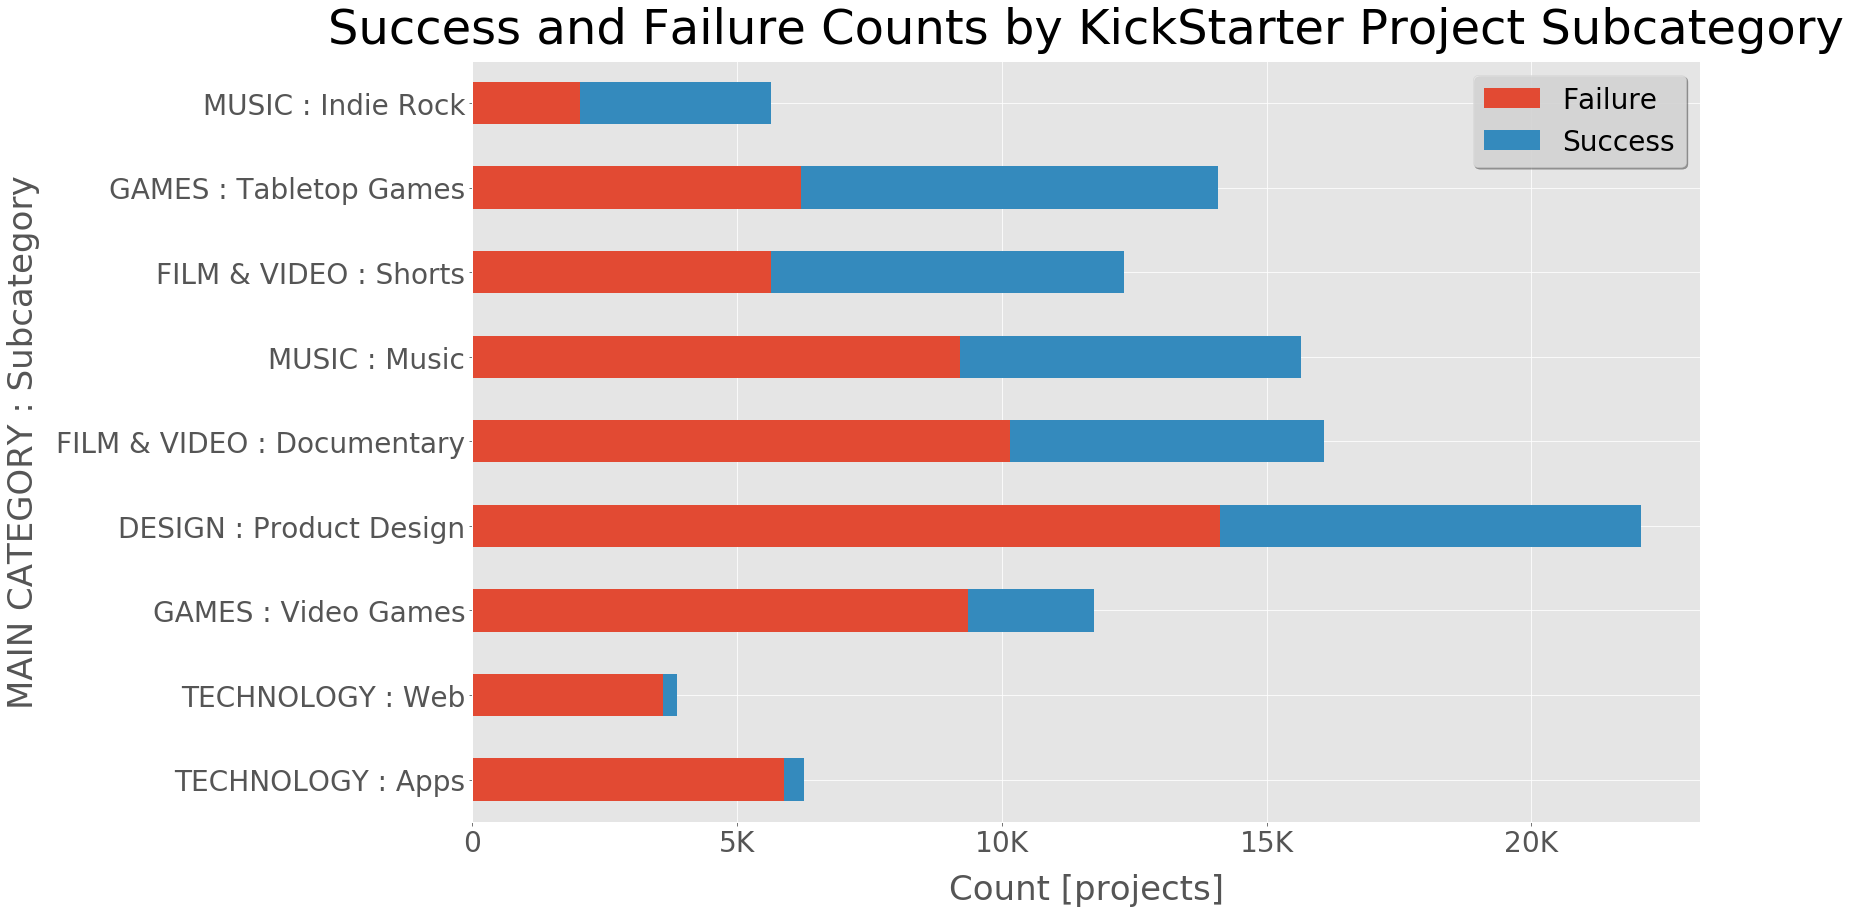

In [77]:
plt.style.use('ggplot')
fig=success_x_subcat.plot.barh(stacked=True, figsize=(22,14), grid=True, fontsize=28)
plt.title("Success and Failure Counts by KickStarter Project Subcategory", fontsize=48, y=1.015)
plt.ylabel("MAIN CATEGORY : Subcategory", fontsize=34, labelpad=16)
plt.xlabel("Count [projects]", fontsize=34, labelpad=16)
fig.xaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.legend(['Failure','Success'], fontsize=28, frameon=True, shadow=True)
plt.show()

ANALYSIS: More 'Indie Rock' and 'Tabletop Games' projects succeed than fail while web and mobile app projects have an extremely low success rate. 'Product Design' and Video Games are more indicative of the normal success rate range outside this sample. I found the success to failure ratio leaders suprising and suspect that lower pledge goals amounts for the successful categories were responsible for their high success rates.

### Success Patterns in Goal Amount (by subcategory)

create df with the goal amounts for failed and successful projects w/o outliers for each subcategory in the sample

In [81]:
goal_x_cat = top18_subcat_df[['main:sub', 'usd_goal_real', 'state_binary']]
goal_x_cat = goal_x_cat[goal_x_cat['usd_goal_real']<100000]

In [82]:
goal_x_cat['state_binary']=goal_x_cat['state_binary'].replace(False, 'Failure')
goal_x_cat['state_binary']=goal_x_cat['state_binary'].replace(True, 'Success')

In [83]:
subcat_ind=list(success_x_subcat.index)
subcat_ind.reverse()

In [84]:
goal_x_cat=goal_x_cat[goal_x_cat['main:sub'].isin(sample)]

##### Distribution of Goal Amounts by Subcategory

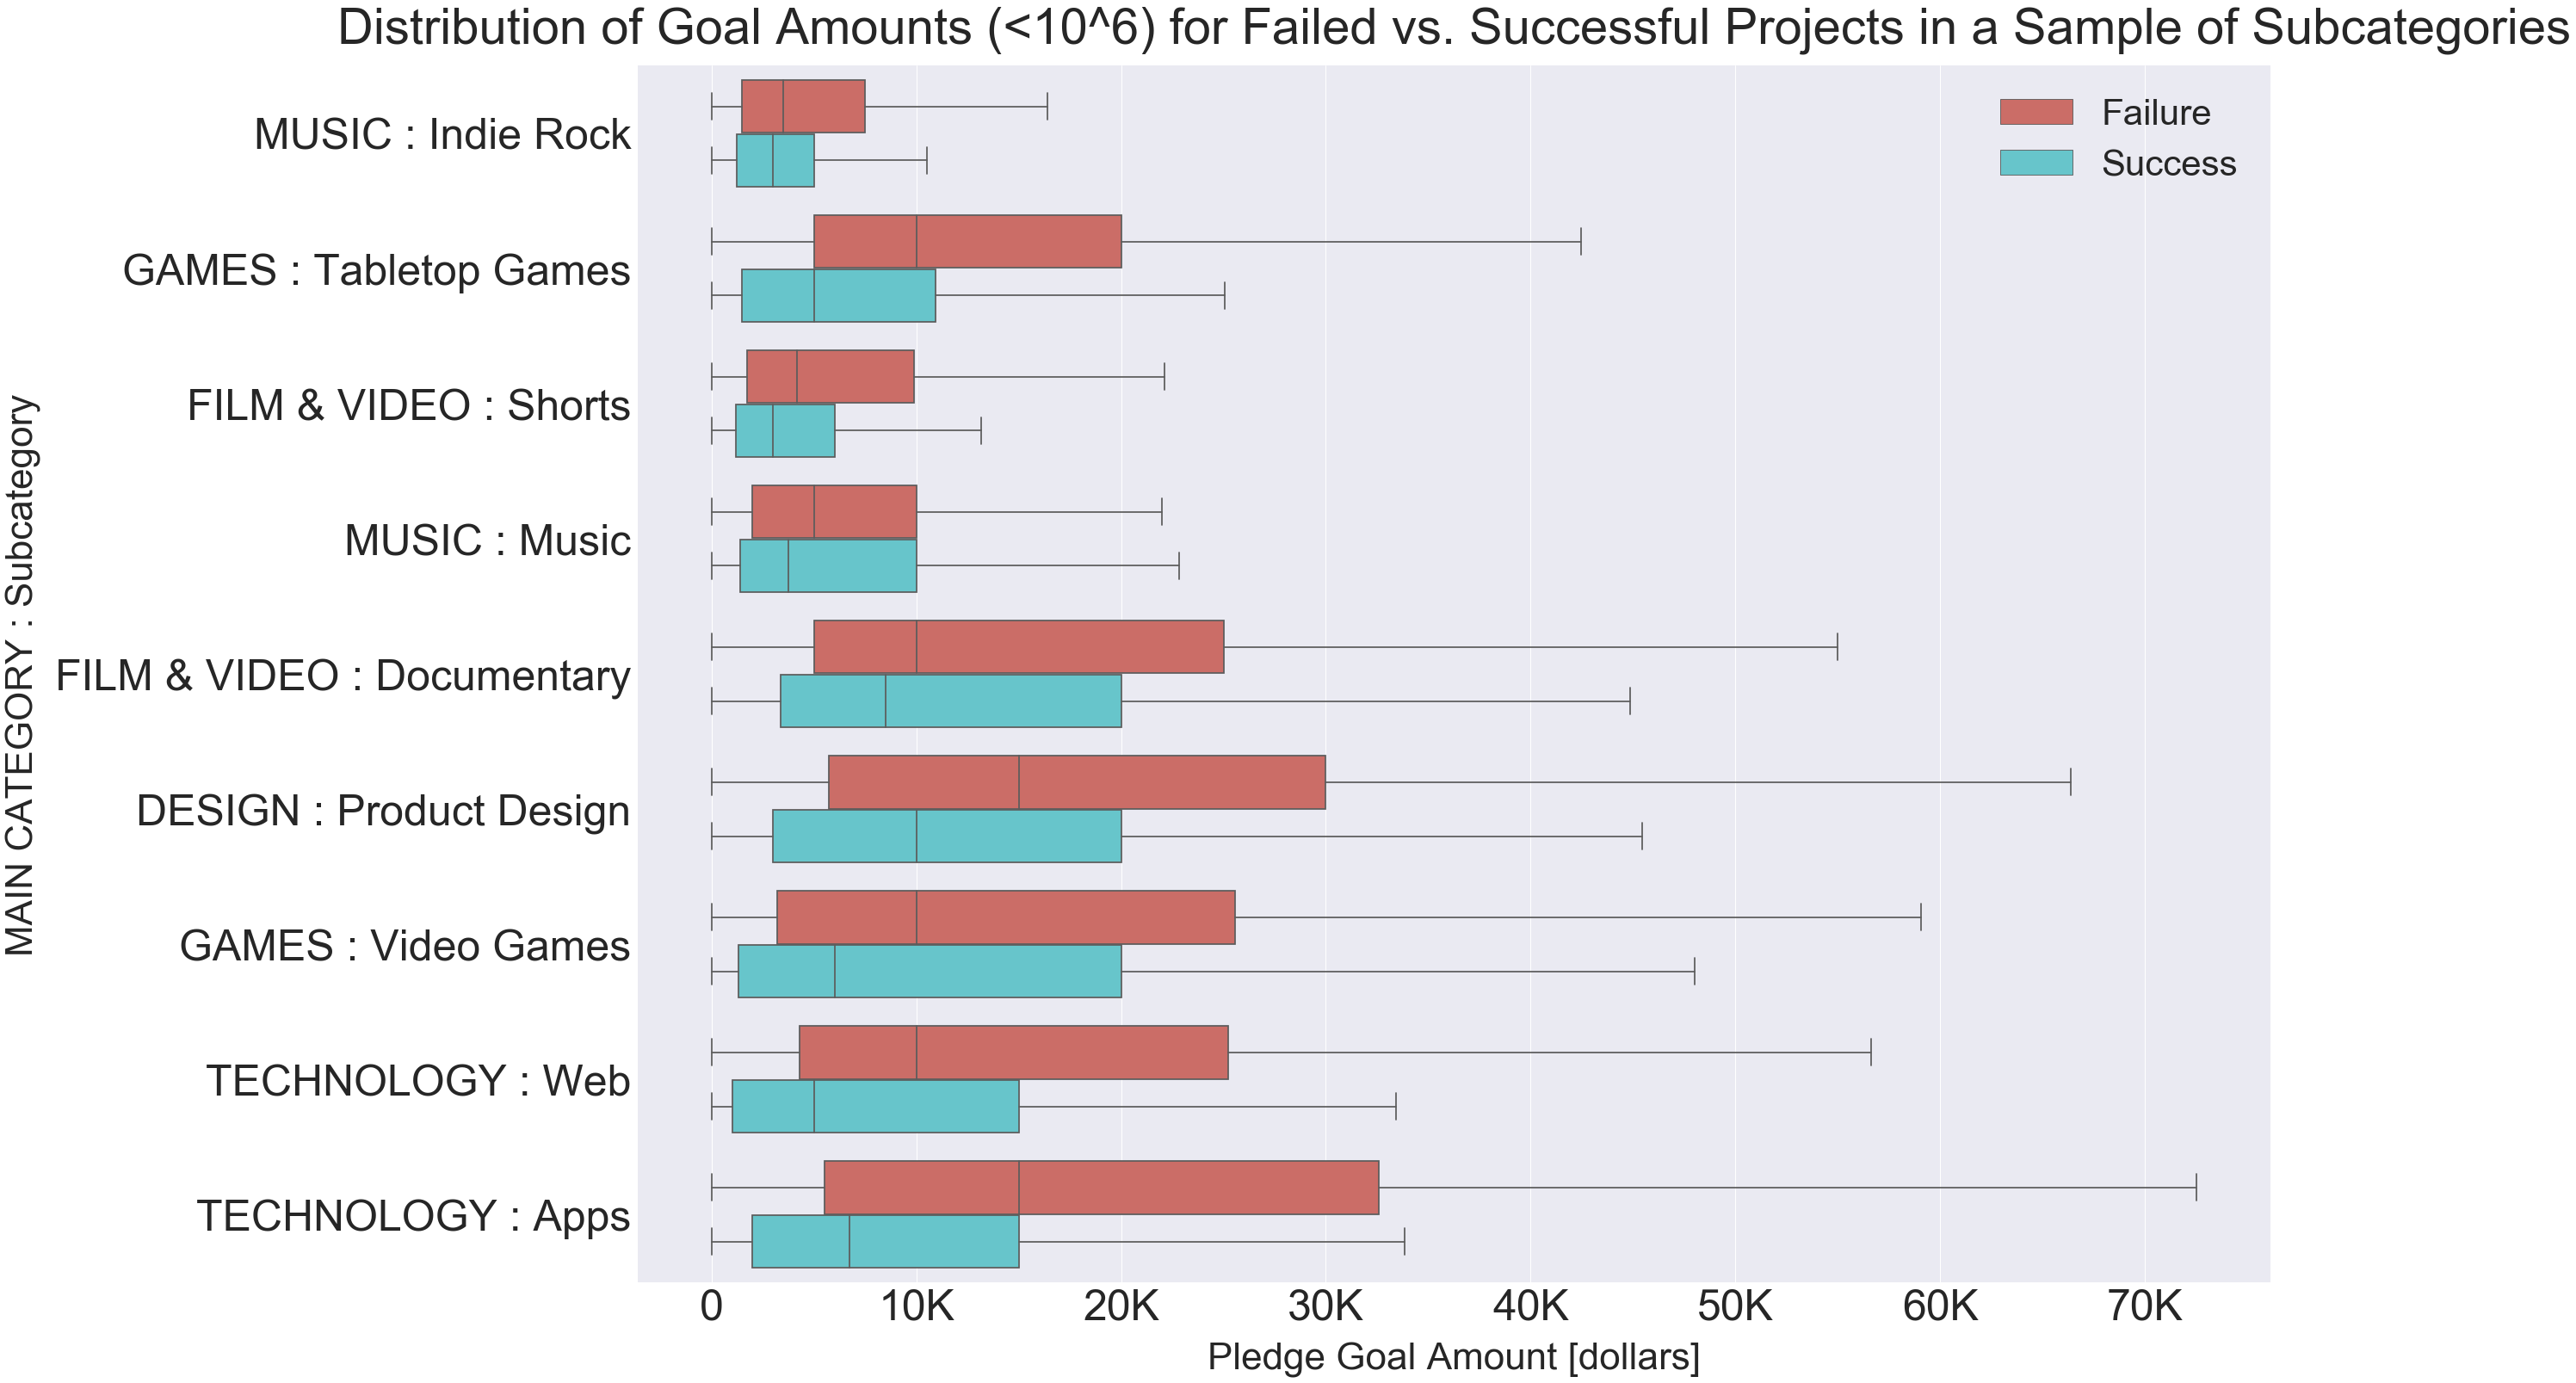

In [91]:
sns.set(rc={'figure.figsize':(34,26)})
sns.set(font_scale=5)
fig=sns.boxplot(y='main:sub', x='usd_goal_real',palette='hls', 
                hue='state_binary', data=goal_x_cat, order=sample, showfliers=False)
fig.xaxis.labelpad=10
fig.yaxis.labelpad=10
fig.xaxis.set_major_formatter(plt.FuncFormatter(fmt_x))
plt.title('Distribution of Goal Amounts (<10^6) for Failed vs. Successful Projects in a Sample of Subcategories', fontsize=58, y=1.015)
plt.ylabel("MAIN CATEGORY : Subcategory", fontsize=44, labelpad=16)
plt.xlabel("Pledge Goal Amount [dollars]", fontsize=44, labelpad=16)
plt.legend(fontsize=42)
for txt in fig.texts:
    txt.set_visible(False)
plt.show()

ANALYSIS:  In view of the success rates from the previous graph, my hyposthesis that lower goal amounts were highly correlated with success was incorrect as 'Tabletop Games' and 'Web' have approximately equal median goal amounts but wildly differing success rates. Another interesting takeaway from this graph is the "goal sensitivity" - the extent to which success is determined by a lower relative goal amount - of each category. 'Music' for example, successful and failed projects of which have nearly identical variances and medians, is highly "goal insensitive", implying that success is determined by factors other than the goal amount, like merit and marketing, for this category. 'Apps' on the other hand is highly "goal sensitive", where a low goal amount contributes more towards success than other less sensitive categories.

### KickStarter Title Wording in Failed and Successful Projects

In [73]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

remove stop words, punctuation and stem the words for a failed df and successful df

In [74]:
def remove_stop(name):
    ret_arr=[]
    try:
        name_arr=name.split(" ")
    except AttributeError:
        name_arr=[str(name)]
    for w in name_arr:
        w=w.lower()
        if w not in stop_words and len(w)>1:
            ret_arr.append(w)  
    return ret_arr

In [75]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stem(x):
    ret_arr=[]
    for w in x:
        stem=stemmer.stem(w)
        ret_arr.append(stem)
    return ret_arr

In [76]:
failed_df=df[df['state_binary']==False]
succ_df=df[df['state_binary']==True]

In [78]:
failed_df['name2']=failed_df['name'].str.replace('[^\w\s]','')
succ_df['name2']=succ_df['name'].str.replace('[^\w\s]','')

/Users/gregmurray/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
failed_df['name2']=failed_df['name2'].apply(remove_stop)
succ_df['name2']=succ_df['name2'].apply(remove_stop)

/Users/gregmurray/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
failed_df['stemmed_name']=failed_df['name2'].apply(stem)
succ_df['stemmed_name']=succ_df['name2'].apply(stem)

/Users/gregmurray/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


turn the df's into a corpus (one big string of ' ' separated words)

In [84]:
fail_name_arr=[]
fail_name_arr.extend(failed_df['stemmed_name'])

In [85]:
succ_name_arr=[]
succ_name_arr.extend(succ_df['stemmed_name'])

In [86]:
fail_flat_list = [item for sublist in fail_name_arr for item in sublist]
for sublist in fail_name_arr:
    for item in sublist:
        fail_flat_list.append(item)

In [87]:
succ_flat_list = [item for sublist in succ_name_arr for item in sublist]
for sublist in succ_name_arr:
    for item in sublist:
        succ_flat_list.append(item)

In [88]:
fail_corp=str(fail_flat_list)[1:-1]
fail_corp=fail_corp.replace("'", "")
fail_corp=fail_corp.replace(',', '')
fail_corp=fail_corp.replace('cancel', '')

In [89]:
succ_corp=str(succ_flat_list)[1:-1]
succ_corp=succ_corp.replace("'", "")
succ_corp=succ_corp.replace(',', '')
succ_corp=succ_corp.replace('cancel', '')

remove the words that are clearly category identifiers

In [152]:
def remove_cat_words(s):
    s=s.replace('project ', '')
    s=s.replace('new ', '')
    s=s.replace('book ', '')
    s=s.replace('album ', '')
    s=s.replace('film ', '')
    s=s.replace('documentari ', '')
    s=s.replace('game ', '')
    s=s.replace('music ', '')
    s=s.replace('art ', '')
    s=s.replace('short ', '')
    s=s.replace('video ', '')
    s=s.replace('record ', '')
    s=s.replace('debut ', '')
    s=s.replace('ep ', '')
    s=s.replace('cd ', '')
    s=s.replace('stori ', '')
    s=s.replace('app ', '')
    s=s.replace('seri ', '')
    s=s.replace('design ', '')
    s=s.replace('children ', '')
    s=s.replace('movi ', '')
    s=s.replace('card ', '')
    s=s.replace('  ', ' ')
    return s

In [153]:
succ_corp=remove_cat_words(succ_corp)
fail_corp=remove_cat_words(fail_corp)

### Failed Project Titles Wordcloud

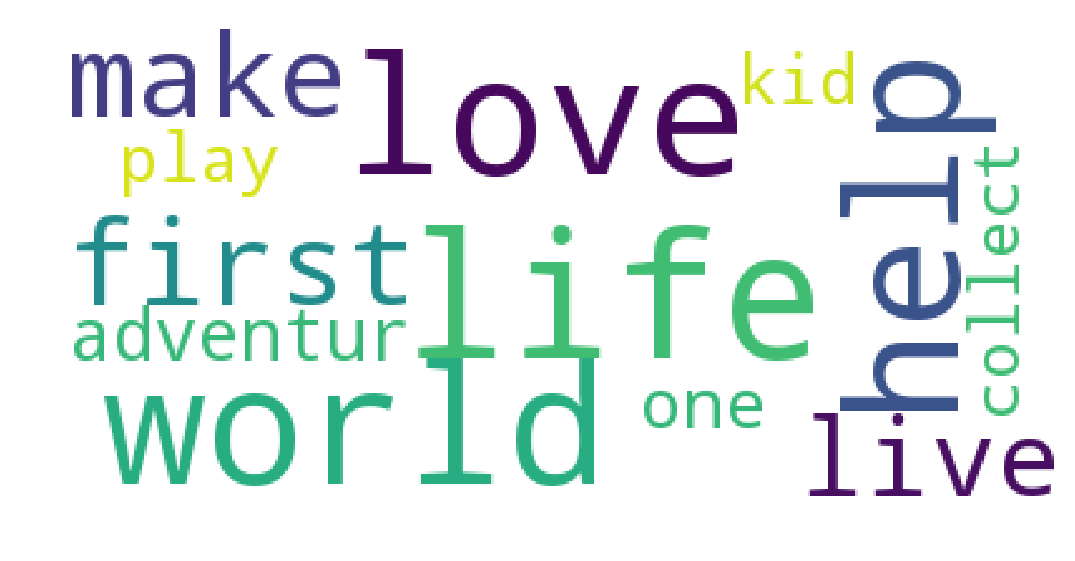

In [154]:
from wordcloud import WordCloud
fail_wordcloud=WordCloud(max_words=12, background_color='white').generate(fail_corp)
plt.imshow(fail_wordcloud)
plt.axis("off")
plt.show()

###  Successful Project Titles Wordcloud

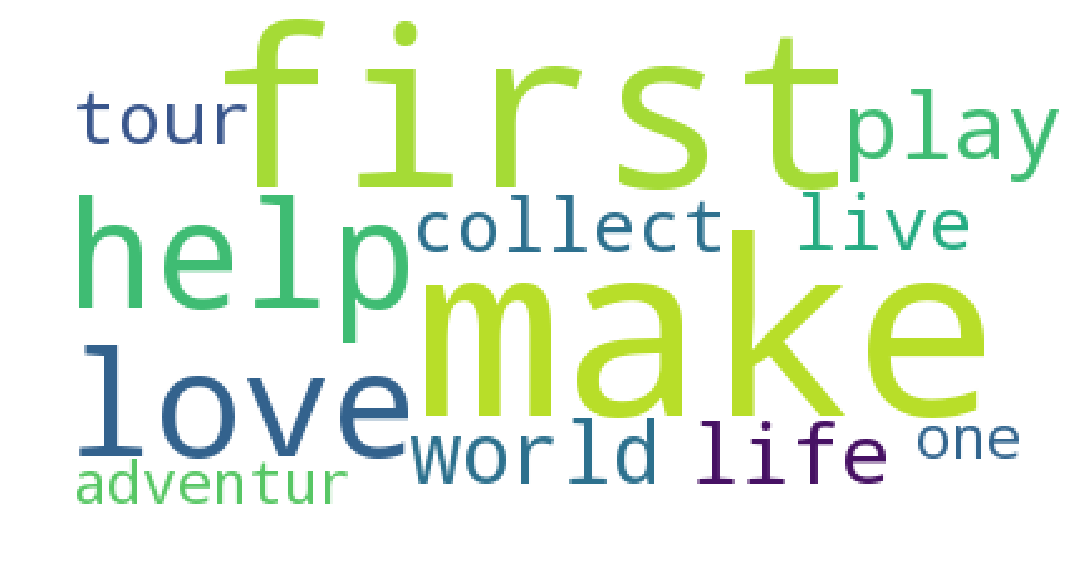

In [157]:
succ_wordcloud=WordCloud(max_words=12, background_color='white').generate(succ_corp)
plt.imshow(succ_wordcloud)
plt.axis("off")
plt.show()

ANALYSIS: I used the same colors and formatting for both the failed and successful word clouds because there was no apparent difference between the wording in the titles of the two groups. Almost all the top words were referencing the category. 